In [1]:
# Por ultimo, probaremos agrupar los datos a traves del metodo de factorizacion de matrices.
# Basicamente, lo que buscaremos aqui es descomponer la matriz sparse que se genera con la 
# frecuencia relativa de cada palabra y aproximarla con una combinacion lineal de k temas

In [2]:
with open('objetos.txt') as txt:
    lines = txt.read().split('\n\n')

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Nuevamente, agregamos las restricciones al vectorizador encontradas previamente, y sumamos otras
# observadas en el proceso de LDA que no aportan a definir un tipo de objeto de sociedad
stop_w = ['de','la','a','el','que','en','los','las','con','al','sus','del','por','como','para','toda','todo','servicios',
         'cualquier','otros','general','tipo','tipos','actividades','ya','similares','objeto','no','actividad','otra',
         'terceros','cuenta','propia','bienes','clase','ajena','act','propios','sociedad','sociedades','socios','su','sea',
         'relacionadas','otras','relacionados','especializado','especializados','nuevos','empleadores']

tfidf = TfidfVectorizer(max_df=0.9,min_df=2,stop_words=stop_w)

In [5]:
mtx = tfidf.fit_transform(lines)

In [6]:
# Ahora importamos la clase NMF (Non matrix Factorization)
from sklearn.decomposition import NMF

In [7]:
# Tal como fue mencionado en el metodo LDA, trataremos de definir 15 tipos de objeto
k = 15
nmf_model = NMF(n_components=k,random_state=7)

In [8]:
nmf_model.fit(mtx)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=15, random_state=7, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [9]:
# Observamos las 10 palabras mas utilizadas por tipos de objeto
for i, tema in enumerate(nmf_model.components_):
    print(f"Tema {i}:")
    print([tfidf.get_feature_names()[index] for index in tema.argsort()[-10:]])
    print("\n")

Tema 0:
['venta', 'alimentos', 'bebidas', 'tabacos', 'prod', 'realizado', 'almc', 'almacenes', 'comercio', 'menor']


Tema 1:
['embarcaciones', 'demolición', 'electricidad', 'ferretería', 'muebles', 'proyectos', 'obras', 'materiales', 'edificios', 'construcción']


Tema 2:
['áridos', 'agricolas', 'trasnporte', 'arriendo', 'nacional', 'pasajeros', 'transportes', 'transporte', 'carretera', 'carga']


Tema 3:
['inversiones', 'muebles', 'compra', 'inmuebles', 'explotación', 'prestación', 'distribución', 'exportación', 'importación', 'comercialización']


Tema 4:
['experimental', 'publicidad', 'jurídicas', 'asesoramiento', 'empresarial', 'organizaciones', 'empresas', 'prestadas', 'profesionales', 'empresariales']


Tema 5:
['industrial', 'estructuras', 'edificios', 'ingenieria', 'mantencion', 'civiles', 'contratista', 'construccion', 'menores', 'obras']


Tema 6:
['maquinaria', 'motocicletas', 'venta', 'accesorios', 'piezas', 'partes', 'mantenimiento', 'reparación', 'vehículos', 'automotore

In [10]:
# Asociamos los tipos de objetos a cada entrada
import pandas as pd

In [11]:
df = pd.DataFrame()

In [12]:
temas_resultantes = nmf_model.transform(mtx)

In [13]:
df['Texto'] = lines
df['Grupo'] = temas_resultantes.argmax(axis=1)

In [14]:
df.head()

,Texto,Grupo
0,"CONSTRUCCIÓN, ALQUILER DE OTROS TIPOS DE MAQUI...",9
1,el servicio de turismo por todo el territorio ...,3
2,SALON DE BELLEZA.,7
3,"CURSOS ONLINE DE MUSICA, COCINA, CLASES DE MUS...",3
4,"el ejercicio de la actividad comercial,importa...",3


In [15]:
rep = {0:'Venta de Alimentos',1:'Servicios de Construccion',2:'Servicios de Transporte',3:'Inversiones, compras y ventas',
       4:'Asesoramiento Empresarial',5:'Ingenieria y Construccion',6:'Servicio Automotriz',7:'Venta de Articulos/Alimentos',
       8:'Arriendo de Equipos, Arquitectura e Ingenieria',9:'Asesoramiento, Inversiones y Arrendamiento',10:'Bar y Restaurants',
       11:'Fabricacion de textiles y muebles',12:'Servicios Medicos',13:'Servicios de Transporte',
       14:'Servicios Informaticos y de Telecomunicaciones'}

In [16]:
df['Nombre del Grupo'] = df['Grupo'].map(rep)

In [17]:
df.head()

,Texto,Grupo,Nombre del Grupo
0,"CONSTRUCCIÓN, ALQUILER DE OTROS TIPOS DE MAQUI...",9,"Asesoramiento, Inversiones y Arrendamiento"
1,el servicio de turismo por todo el territorio ...,3,"Inversiones, compras y ventas"
2,SALON DE BELLEZA.,7,Venta de Articulos/Alimentos
3,"CURSOS ONLINE DE MUSICA, COCINA, CLASES DE MUS...",3,"Inversiones, compras y ventas"
4,"el ejercicio de la actividad comercial,importa...",3,"Inversiones, compras y ventas"


In [18]:
# De manera similar al metodo LDA, podemos ver los coeficientes que definen a que grupo pertence algun objeto.
# Elegimos nuevamente el elemento 1759
import seaborn as sns
import matplotlib.pyplot as plt

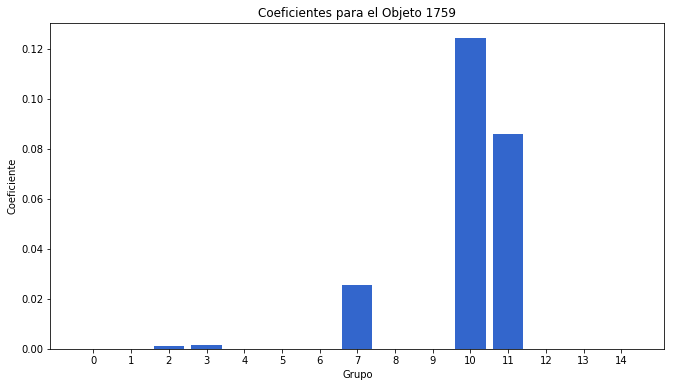

In [19]:
plt.figure(figsize=(11,6))
plt.xticks(range(0,15),range(0,15))
plt.bar(range(0,15),temas_resultantes[1759],color="#3366cc")
plt.title("Coeficientes para el Objeto 1759")
plt.xlabel("Grupo")
plt.ylabel("Coeficiente")
plt.show()

In [20]:
# Vemos que el coeficiente mas relevante es el 10, seguido por el 11. Podemos observar su clasificacion
print('Grupo mas probable: '+rep[10])
print('Segundo grupo probable: '+rep[11])
print(df['Texto'].iloc[1759])

Grupo mas probable: Bar y Restaurants
Segundo grupo probable: Fabricacion de textiles y muebles
COMERCIALIZACION Y FABRICACIÓN DE MUEBLES, ELABORACIÓN DE OTROS PRODUCTOS ALIMENTICIOS, COMERCIALIZACION DE PRODUCTOS ALIMENTICIOS, EXPLOTACION DE NEGOCIOS DE CAFETERIAS Y RESTAURANTES.


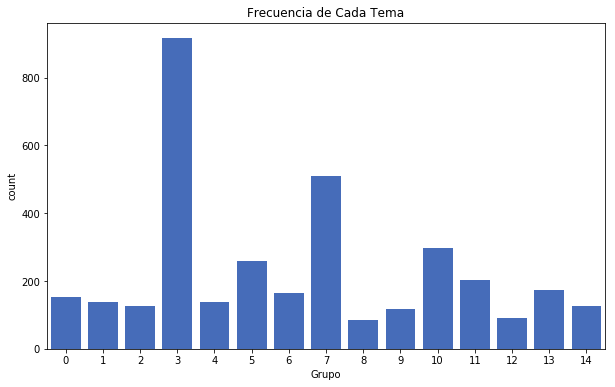

In [21]:
# Por ultimo, observamos el grupo mas frecuente
plt.figure(figsize=(10,6))
sns.countplot(x='Grupo',data=df,color="#3366cc")
plt.title("Frecuencia de Cada Tema")
plt.show()

In [22]:
# En este caso, lo mas frecuente fue dado por el grupo 3
print(rep[3])

Inversiones, compras y ventas
